# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Diane\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


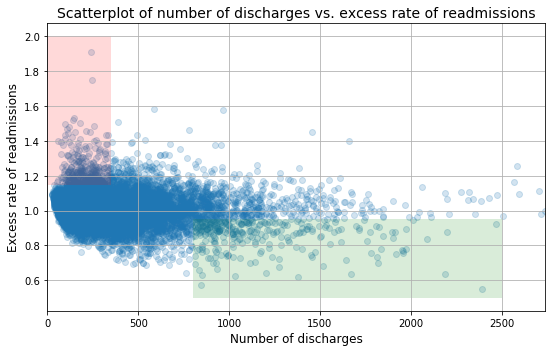

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis. We can't say there is a significant correlation between hospital capacity and readmission rates with these statistics tests and this scatter plot. The scatter plot don't seem to indicate a strong significant positive correlation between the two variables because the linear regression line has not been traced. And we have to calculate a pearson correlation coefficient to be sure of this significant correlation. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

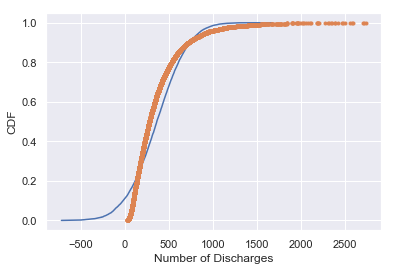

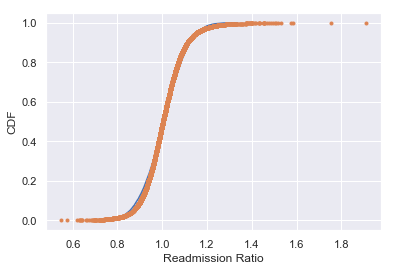

In [5]:
# Checking normality
x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
# Cumulative Distribution Fonction plot
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
# Number of discharges
mean_d=np.mean(x)
std_d=np.std(x)
samples_d=np.random.normal(mean_d,std_d,size=10000)
x_d,y_d=ecdf(x)
x_d_theor,y_d_theor=ecdf(samples_d)
import seaborn as sns
sns.set()
_=plt.plot(x_d_theor,y_d_theor)
_=plt.plot(x_d,y_d,marker='.',linestyle='none')
_=plt.xlabel('Number of Discharges')
_=plt.ylabel('CDF')
_=plt.show()
# Readmission ratio
mean_r=np.mean(y)
std_r=np.std(y)
samples_r=np.random.normal(mean_r,std_r,size=10000)
x_r,y_r=ecdf(y)
x_r_theor,y_r_theor=ecdf(samples_r)
import seaborn as sns
sns.set()
_=plt.plot(x_r_theor,y_r_theor)
_=plt.plot(x_r,y_r,marker='.',linestyle='none')
_=plt.xlabel('Readmission Ratio')
_=plt.ylabel('CDF')
_=plt.show()

According to the CDF plot, the readmission ratio seems to be normal, this is less the case for the low values of the number of discharges.

Null Hypothesis: the two variables Readmission Ratio and Number of Discharges are completely uncorrelated 

### 2. Compute and report the observed significance value (or p-value).

In [10]:
# Hypothesis test on Pearson correlation 
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

# Compute observed correlation
r_obs = pearson_r(x,y)

print('Observed significance value =',r_obs)

Observed significance value = -0.09309554287590442


### 3. Report statistical significance for 𝛼= .01. 

In [14]:
# Permutation replicates
perm_replicates = np.empty(10000)
for i in range(10000):
    x_permuted = np.random.permutation(x)
    perm_replicates[i] = pearson_r(x_permuted,y)
# Compute p_value
p = np.sum(np.abs(perm_replicates)>=np.abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The p_value is very low, so we reject the null hypothesis. There is a significant correlation between the Readmission Ratio and the Number of Discharges. There is a higher Readmission ratio for the smaller hospitals. The first recommendations made for the client are goods.

### 5. Look at the scatterplot above. 
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

The scatter plot is usefull to see the distribution of values in general but it's not enough to know if the two variables are correlated and how they interact. To know that, We need to plot the linear regression line.

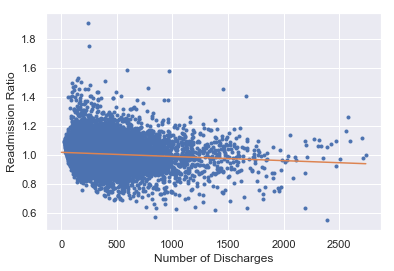

In [8]:
# Linear regression by Least Squares
slope,intercept=np.polyfit(x,y,1)
X=np.array([0,max(x)])
Y=slope*X+intercept
# Scatter plot 
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.plot(X,Y)
_=plt.xlabel('Number of Discharges')
_=plt.ylabel('Readmission Ratio')
plt.show()